<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [ ]:
# WRITE YOUR CODE HERE
#install.packages('pls')

library(tidyverse)
library(pls)
library(ggplot2)

Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame. 

In [3]:
df_hw <- read.csv('/content/unrestricted_trimmed_1_7_2020_10_50_44.csv')
d1 <- df_hw %>%
  select(Flanker_Unadj, ends_with("_Vol"))

# Remove NA's
d1 <- na.omit(d1)
d1 <- d1 %>%
  select(where(~sum(.) != 0))
head(d1)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
3,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
4,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
5,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
6,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
7,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [4]:
df_fs <- d1 %>%
  select(starts_with("FS_"))
fs_cor <- cor(df_fs)
fs_cor

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.00000000,0.89775779,0.84001739,0.8439151,0.84527801,0.78851398,0.8751297,0.88515809,0.83110860,0.82780629,⋯,0.15363321,0.428612089,0.087584249,0.222582581,0.33097622,0.34486799,0.18960892,0.197341425,0.284599652,0.40182119
FS_BrainSeg_Vol,0.89775779,1.00000000,0.94481588,0.9482717,0.95026178,0.86899391,0.9664839,0.99584206,0.95025059,0.94827234,⋯,0.20678367,0.412581030,0.049790923,0.323144337,0.35006717,0.37677373,0.27243466,0.270768619,0.353484192,0.43087227
FS_LCort_GM_Vol,0.84001739,0.94481588,1.00000000,0.9844592,0.99601958,0.78978633,0.9821287,0.94856174,0.82823562,0.82204438,⋯,0.17001517,0.351647503,0.027475287,0.327222174,0.27354855,0.25151569,0.19618089,0.208943426,0.257297934,0.31406264
FS_RCort_GM_Vol,0.84391512,0.94827175,0.98445925,1.0000000,0.99619391,0.79257235,0.9830322,0.95186738,0.83308464,0.83075164,⋯,0.17595431,0.344117704,0.034303100,0.339033622,0.28341844,0.24448681,0.19182668,0.211885362,0.259001604,0.30540697
FS_TotCort_GM_Vol,0.84527801,0.95026178,0.99601958,0.9961939,1.00000000,0.79428656,0.9864250,0.95394600,0.83393307,0.82967591,⋯,0.17369412,0.349199524,0.031048540,0.334495942,0.27962765,0.24893064,0.19473767,0.211253307,0.259167897,0.31089656
FS_SubCort_GM_Vol,0.78851398,0.86899391,0.78978633,0.7925724,0.79428656,1.00000000,0.8407289,0.85912648,0.82483108,0.82505024,⋯,0.23081438,0.381043922,0.028549272,0.277929493,0.32808259,0.36367157,0.31694057,0.270171847,0.332095449,0.40412120
FS_Total_GM_Vol,0.87512975,0.96648393,0.98212867,0.9830322,0.98642496,0.84072890,1.0000000,0.95676918,0.84630850,0.84265274,⋯,0.19061124,0.365072324,0.036498799,0.327752825,0.30026585,0.26509338,0.21393596,0.227828080,0.273788710,0.32692300
FS_SupraTentorial_Vol,0.88515809,0.99584206,0.94856174,0.9518674,0.95394600,0.85912648,0.9567692,1.00000000,0.95657235,0.95448952,⋯,0.20303200,0.410095816,0.047016231,0.326916622,0.34304042,0.38403125,0.27388840,0.268821695,0.356887229,0.43655852
FS_L_WM_Vol,0.83110860,0.95025059,0.82823562,0.8330846,0.83393307,0.82483108,0.8463085,0.95657235,1.00000000,0.99720862,⋯,0.20733288,0.360053967,0.041169736,0.312125828,0.35983007,0.46628464,0.37067576,0.352852343,0.445780348,0.50126064
FS_R_WM_Vol,0.82780629,0.94827234,0.82204438,0.8307516,0.82967591,0.82505024,0.8426527,0.95448952,0.99720862,1.00000000,⋯,0.20560868,0.360960457,0.041746175,0.316231493,0.36438062,0.46048694,0.36768598,0.351758721,0.441418100,0.49765782


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [6]:
#install.packages('reshape2')
library(reshape2)

melt_cor <- melt(fs_cor)
head(melt_cor)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

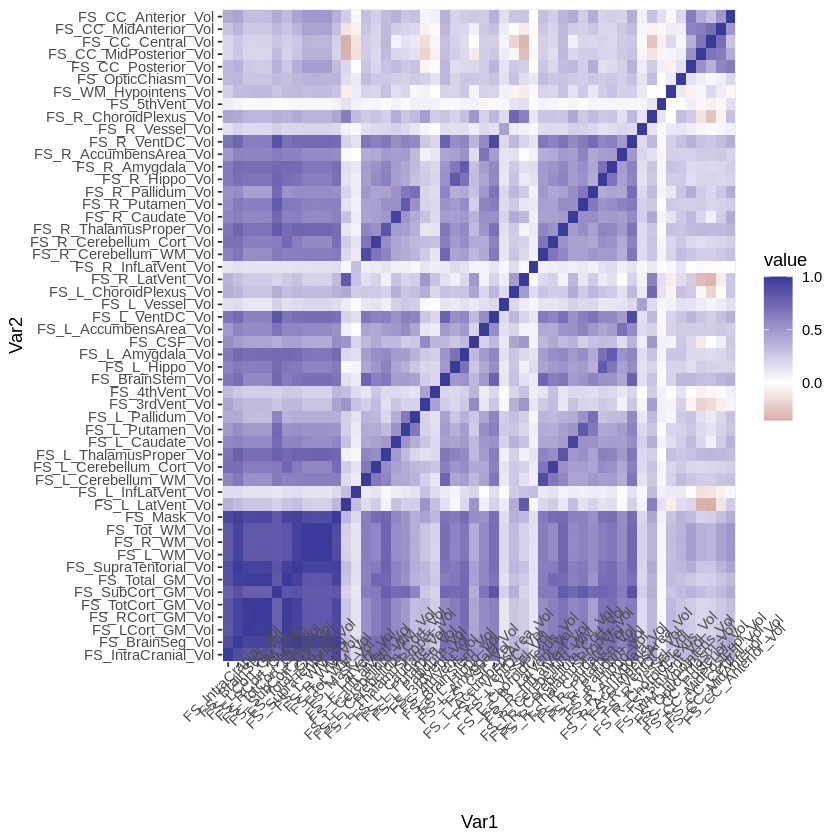

In [7]:
#install.packages('ggcorrplot')
#library(ggcorrplot) 

# Alternative method
#ggcorrplot(fs_cor) +
  #scale_fill_gradient2()

ggplot(melt_cor, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2() +
  theme(axis.text.x = element_text(angle = 45))


What patterns do you see in the correlations?

> *Most of the variables are positively correlated; there are very few variables that are negatively correlated, and the negative correlations are only moderate.* 


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [8]:
fs_d.pca <- princomp(df_fs, scale. = TRUE)
summary(fs_d.pca)

options(warn = -1)

Warning message:
“In princomp.default(df_fs, scale. = TRUE) :
 extra argument ‘scale.’ will be disregarded”


Importance of components:
                             Comp.1       Comp.2       Comp.3       Comp.4
Standard deviation     3.172141e+05 6.576735e+04 3.269422e+04 3.154782e+04
Proportion of Variance 9.384239e-01 4.033804e-02 9.968642e-03 9.281817e-03
Cumulative Proportion  9.384239e-01 9.787619e-01 9.887306e-01 9.980124e-01
                             Comp.5       Comp.6       Comp.7       Comp.8
Standard deviation     1.150332e+04 6.670165e+03 3.362328e+03 3.240693e+03
Proportion of Variance 1.234073e-03 4.149228e-04 1.054325e-04 9.794225e-05
Cumulative Proportion  9.992464e-01 9.996614e-01 9.997668e-01 9.998647e-01
                             Comp.9      Comp.10      Comp.11      Comp.12
Standard deviation     2.284236e+03 1.501755e+03 1.302839e+03 1.225383e+03
Proportion of Variance 4.866045e-05 2.103256e-05 1.582980e-05 1.400355e-05
Cumulative Proportion  9.999134e-01 9.999344e-01 9.999503e-01 9.999643e-01
                            Comp.13      Comp.14      Comp.15      Comp.16

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

Comp.1       Comp.2       Comp.3       Comp.4       Comp.5       Comp.6 
9.384239e-01 4.033804e-02 9.968642e-03 9.281817e-03 1.234073e-03 4.149228e-04 
      Comp.7       Comp.8       Comp.9      Comp.10      Comp.11      Comp.12 
1.054325e-04 9.794225e-05 4.866045e-05 2.103256e-05 1.582980e-05 1.400355e-05 
     Comp.13      Comp.14      Comp.15      Comp.16      Comp.17      Comp.18 
1.174703e-05 4.522765e-06 3.488714e-06 3.300915e-06 2.198691e-06 1.845716e-06 
     Comp.19      Comp.20      Comp.21      Comp.22      Comp.23      Comp.24 
1.312375e-06 1.149346e-06 1.041145e-06 8.865290e-07 7.245871e-07 4.565702e-07 
     Comp.25      Comp.26      Comp.27      Comp.28      Comp.29      Comp.30 
3.336191e-07 3.139883e-07 2.914070e-07 2.604192e-07 2.418208e-07 2.083277e-07 
     Comp.31      Comp.32      Comp.33      Comp.34      Comp.35      Comp.36 
1.907115e-07 1.621575e-07 1.499577e-07 1.212692e-07 1.153568e-07 1.050758e-07 
     Comp.37      Comp.38      Comp.39      Comp.40      Comp.41      Comp.42 
8.846803e-08 8.273485e-08 7.625165e-08 6.793136e-08 5.930650e-08 5.494060e-08 
     Comp.43      Comp.44      Comp.45      Comp.46      Comp.47      Comp.48 
2.847951e-08 2.393330e-08 2.134443e-08 2.023235e-08 1.858846e-08 1.608995e-08 
     Comp.49      Comp.50      Comp.51      Comp.52 
6.678165e-09 2.908858e-10 7.742347e-13 7.181554e-13

Comp.1    Comp.2    Comp.3    Comp.4    Comp.5    Comp.6    Comp.7    Comp.8 
0.9384239 0.9787619 0.9887306 0.9980124 0.9992464 0.9996614 0.9997668 0.9998647 
   Comp.9   Comp.10   Comp.11   Comp.12   Comp.13   Comp.14   Comp.15   Comp.16 
0.9999134 0.9999344 0.9999503 0.9999643 0.9999760 0.9999805 0.9999840 0.9999873 
  Comp.17   Comp.18   Comp.19   Comp.20   Comp.21   Comp.22   Comp.23   Comp.24 
0.9999895 0.9999914 0.9999927 0.9999938 0.9999949 0.9999958 0.9999965 0.9999969 
  Comp.25   Comp.26   Comp.27   Comp.28   Comp.29   Comp.30   Comp.31   Comp.32 
0.9999973 0.9999976 0.9999979 0.9999981 0.9999984 0.9999986 0.9999988 0.9999989 
  Comp.33   Comp.34   Comp.35   Comp.36   Comp.37   Comp.38   Comp.39   Comp.40 
0.9999991 0.9999992 0.9999993 0.9999994 0.9999995 0.9999996 0.9999997 0.9999998 
  Comp.41   Comp.42   Comp.43   Comp.44   Comp.45   Comp.46   Comp.47   Comp.48 
0.9999998 0.9999999 0.9999999 0.9999999 0.9999999 1.0000000 1.0000000 1.0000000 
  Comp.49   Comp.50   Comp.51   Comp.52 
1.0000000 1.0000000 1.0000000 1.0000000

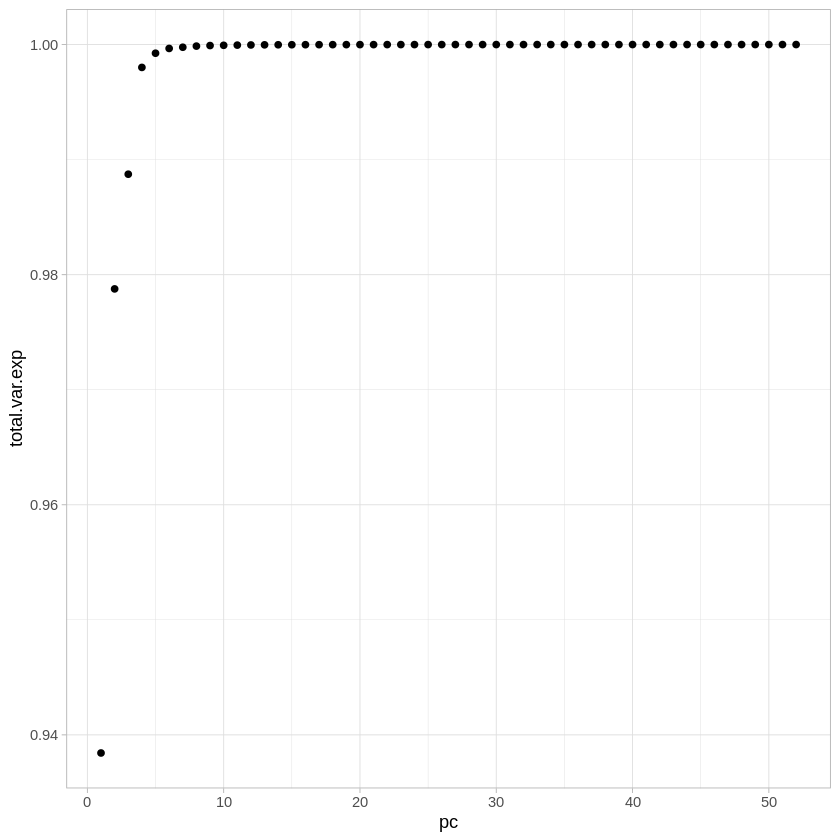

In [9]:
# Get variances
fs_vars <- (fs_d.pca$sdev^2)
# Sum variances
fs_vars / sum(fs_vars)
total_var <- cumsum(fs_vars/ sum(fs_vars))
total_var

# As expected, 100% of the variance is explained by all of the components
ggplot(data.frame(pc=1:52,total.var.exp=total_var),
        aes(x=pc,y=total.var.exp)) + 
    geom_point() + 
    theme_light()

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function. 

In [ ]:
# WRITE YOUR CODE HERE
# Proportion of unique variance explained
# I misinterpreted the question lol...but gonna leave this here for unique variance!
#unique_var <- fs_vars / sum(fs_vars)

#df_pc <- data.frame(pc=1:52,var.exp=unique_var)
#ggplot(data=df_pc, aes(x=pc,y=var.exp)) + 
    #geom_point() + 
    #theme_light()

#which(unique_var >= 0.95)
# Returned no values because all components explain lower than 95%


Comp.2  Comp.3  Comp.4  Comp.5  Comp.6  Comp.7  Comp.8  Comp.9 Comp.10 Comp.11 
      2       3       4       5       6       7       8       9      10      11 
Comp.12 Comp.13 Comp.14 Comp.15 Comp.16 Comp.17 Comp.18 Comp.19 Comp.20 Comp.21 
     12      13      14      15      16      17      18      19      20      21 
Comp.22 Comp.23 Comp.24 Comp.25 Comp.26 Comp.27 Comp.28 Comp.29 Comp.30 Comp.31 
     22      23      24      25      26      27      28      29      30      31 
Comp.32 Comp.33 Comp.34 Comp.35 Comp.36 Comp.37 Comp.38 Comp.39 Comp.40 Comp.41 
     32      33      34      35      36      37      38      39      40      41 
Comp.42 Comp.43 Comp.44 Comp.45 Comp.46 Comp.47 Comp.48 Comp.49 Comp.50 Comp.51 
     42      43      44      45      46      47      48      49      50      51 
Comp.52 
     52

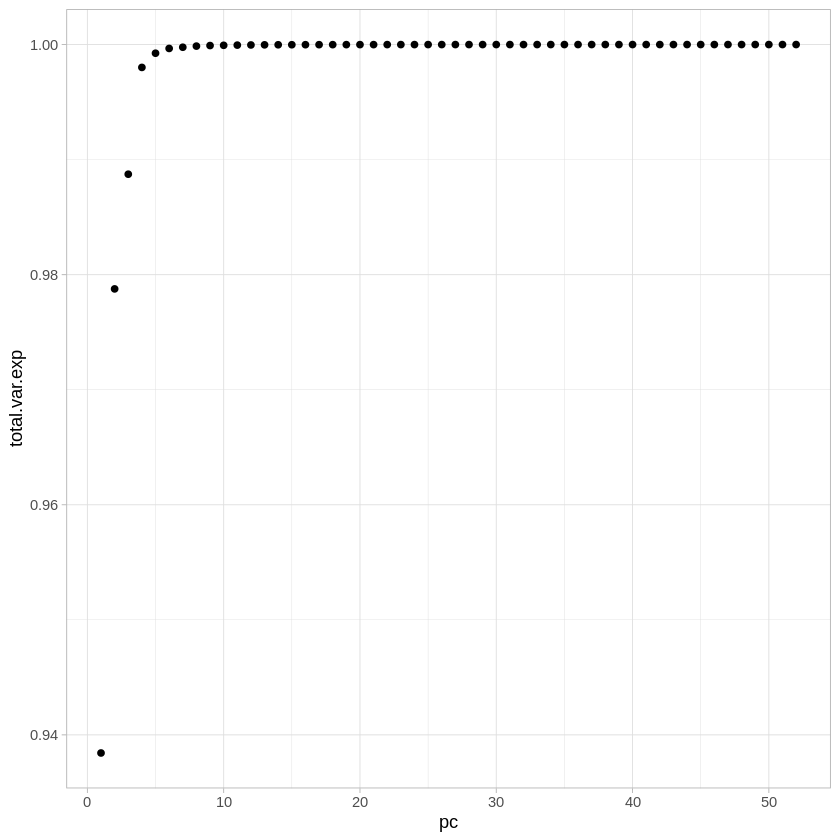

In [29]:
#How many components needed to explain 95% of variance

which(total_var >= 0.95)

# We only need 2 components to explain at least 95%
# Also shown in this graph below
ggplot(data.frame(pc=1:52,total.var.exp=total_var),
        aes(x=pc,y=total.var.exp)) + 
    geom_point() + 
    theme_light()

What does this tell you about the underlying dimensionality of the brain volume measures? 

> *The first component explains most of the variance (~94%), while the rest of the components explain very little variance with all the features in the model. This indicates that the underlying dimensionality of the brain volume measures is lower than the amount of current variables - many of the variables are only poor predictors of variance. 


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [11]:
set.seed(2)
pcr_fit <- pcr(Flanker_Unadj~., data=d1, scale = TRUE, validation="CV")
summary(pcr_fit)


Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

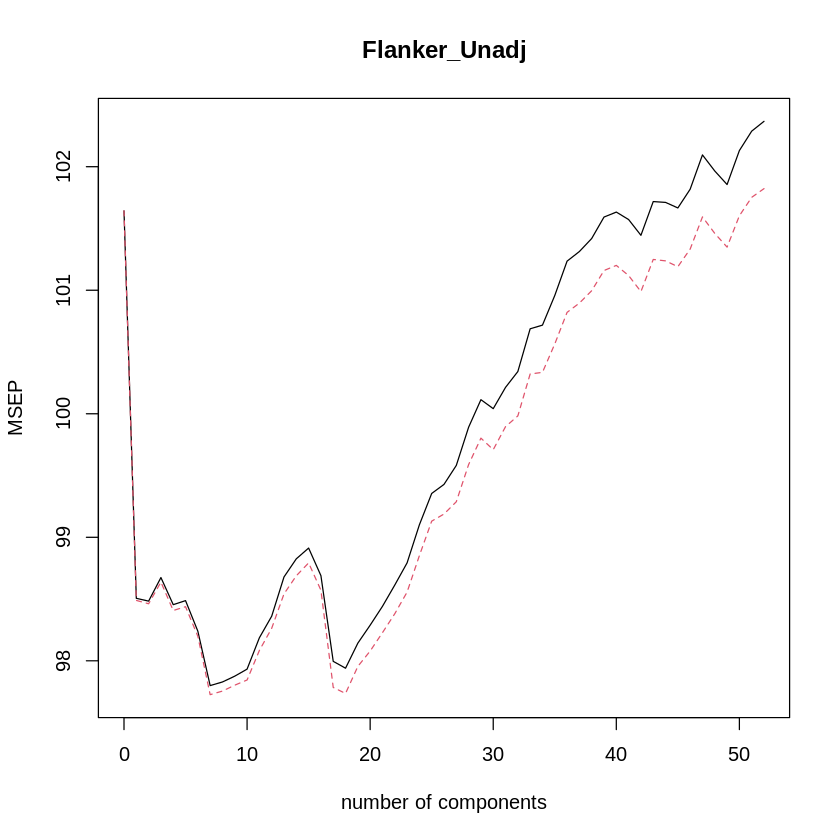

In [12]:
validationplot(pcr_fit,val.type="MSEP")


(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [31]:
#install.packages('mvrVal')
msep <- MSEP(pcr_fit, estimate="CV")
msep_val <- drop(msep$val)
summary(msep_val)

# Get min of first dimension
which(msep_val == min(msep_val)) # 7 components
min(msep_val) #97.8


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  97.80   98.48   99.58   99.89  101.57  102.37 

7 comps 
      8

[1] 97.79933

What what does this plot tell you about how many components best explain variance in Flanker task performance? 

> *The plot (and the code above) suggests that about 7 components is the best for explaining variance in Flanker task performance because this number of components produces the lowest cross-validated mean squared-error.

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *The number of components that explain variance in X alone is slightly less than the number of components that explain Flanker task performance, but they are very close together. This suggests that variation in brain volumes is strongly positively related to Flanker task performance, but we need less than 10 components in a model to explain 99% of the variance. Therefore, for both analyses, using just a small number of components might suffice rather than over 50 variables.* 

> 

**DUE:** 5pm EST, April 17, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Tracie & Adwoa*